# Data visualization

Nous allons étudier les principales bibliothèques de visualisation des données Python


# 1 -- Matplotlib 

---



### Pyplot

In [6]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns

### Graphiques simples

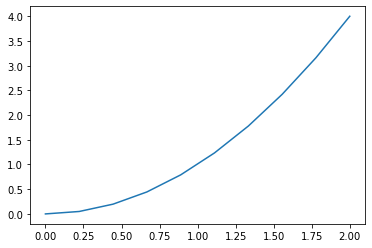

In [2]:
X = np.linspace(0, 2, 10) # on définit X. Il prend 10 valeurs entre 0 et 2 équiréparties
y = X**2 #on veut tracer la fonction y = X^2

plt.plot(X, y)
plt.show()

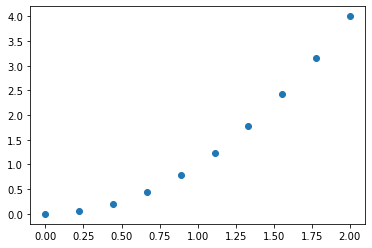

In [3]:
# le scatterplot ne relie pas les points

plt.scatter(X, y)
plt.show()

### Styles Graphiques
Il existe beaucoup de styles à ajouter aux graphiques. Voici les plus importants à retenir :
- **c** : couleur de la ligne
- **lw** : epaisseur de la ligne (pour les graphiques plot)
- **ls** : style de la ligne (pour les graphiques plot)
- **size** : taille du point (pour les graphiques scatter)
- **marker** : style du point (pour les graphiques scatter)
- **alpha** : transparence du graphique



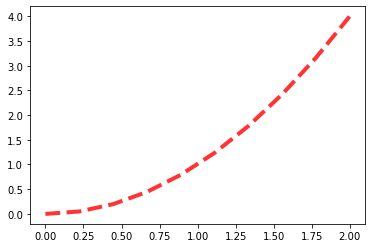

In [4]:
plt.plot(X, y, c='red', lw=4, ls='--', alpha=0.8)
plt.show()

In [5]:
#proposer d'autres versions de ce graphe



## Cycle de vie d'une figure
Pour créer des figures proprement, on doit suivre le cycle de vie suivant :
1. **plt.figure**(figsize())
2. **plt.plot()**
3. Extras (titre, axes, legendes)
4. **plt.show()**

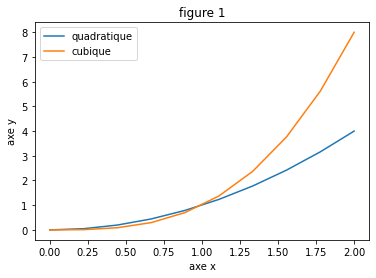

In [5]:
X = np.linspace(0, 2, 10)

plt.figure() # Création d'une figure
plt.plot(X, X**2, label='quadratique') # premiere courbe
plt.plot(X, X**3, label='cubique') # deuxieme courbe
# Extra information
plt.title('figure 1') # titre
plt.xlabel('axe x') # axes
plt.ylabel('axe y') # axes
plt.legend() # legend

plt.savefig('figure.png') # sauvegarde la figure dans le repertoire de travail
plt.show() # affiche la figure

## Subplots
Les subplots sont un autre élément à ajouter pour créer plusieurs graphiques sur une même figure

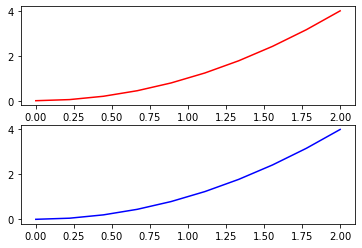

In [7]:
plt.subplot(2, 1, 1)
plt.plot(X, y, c='red')
plt.subplot(2, 1, 2)
plt.plot(X, y, c='blue')

## Méthode orientée objet

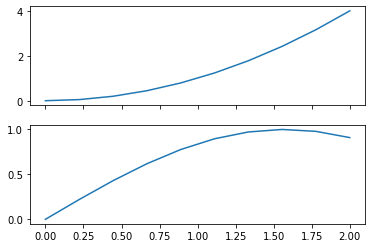

In [6]:
fig, ax = plt.subplots(2, 1, sharex=True) # partage le meme axe pour les subplots
ax[0].plot(X, y)
ax[1].plot(X, np.sin(X))
plt.show()

## Exercice
Créer une fonction "graphique" qui permet de tracer sur une seule et meme figure une série de graphiques issue d'une liste contenant plusieurs datasets :

In [45]:
def graphique(dataset):
  # Votre code ici...
  return

# Voici le dataset utilisé
dataset = [ np.random.randn(100) for i in range(4)]

dataset

[array([-0.61895954, -1.43852066, -0.74881129,  1.10672403,  0.25337873,
         0.13634832, -0.93646815,  0.29962174,  0.53209183,  1.84711824,
         0.90647776,  1.93534205, -1.85669542,  1.20372472,  1.16472198,
         3.55894795,  0.1766692 , -0.44394682,  0.99457558,  1.67945012,
         0.05044355, -2.04429751,  0.30633822,  0.37868784, -0.61717245,
         1.155435  , -1.36053911,  0.83285283, -0.01977732,  0.49520032,
         0.86866347,  2.5708702 , -1.37985901, -0.87547611, -0.12581713,
        -0.41168185, -1.37361801, -1.02764468, -1.02534666, -0.58926252,
         0.03783201,  1.40760581,  1.21704187,  1.05601265,  1.22076422,
        -0.99651707,  0.99288291,  0.60980928, -0.94908187, -0.95534667,
         0.77896688, -1.01640529, -0.8486129 , -0.03679778, -1.14506948,
         0.05598057,  0.24446009,  1.2429393 ,  0.13441114,  1.60959748,
        -0.15788396,  0.79848411,  1.13165555,  0.31011925,  0.30783576,
         0.26332966,  0.14188331,  0.78098316, -1.1

In [64]:
# SOLUTION
def graphique(data):
    n = len(data)
   
    plt.figure(figsize=(12, 20))
    
    for k in  range(0,n):
        plt.subplot(n, 1, k+1)
        plt.plot(data[k])
        plt.title("expérience "+str(k))
        
    plt.show()

4


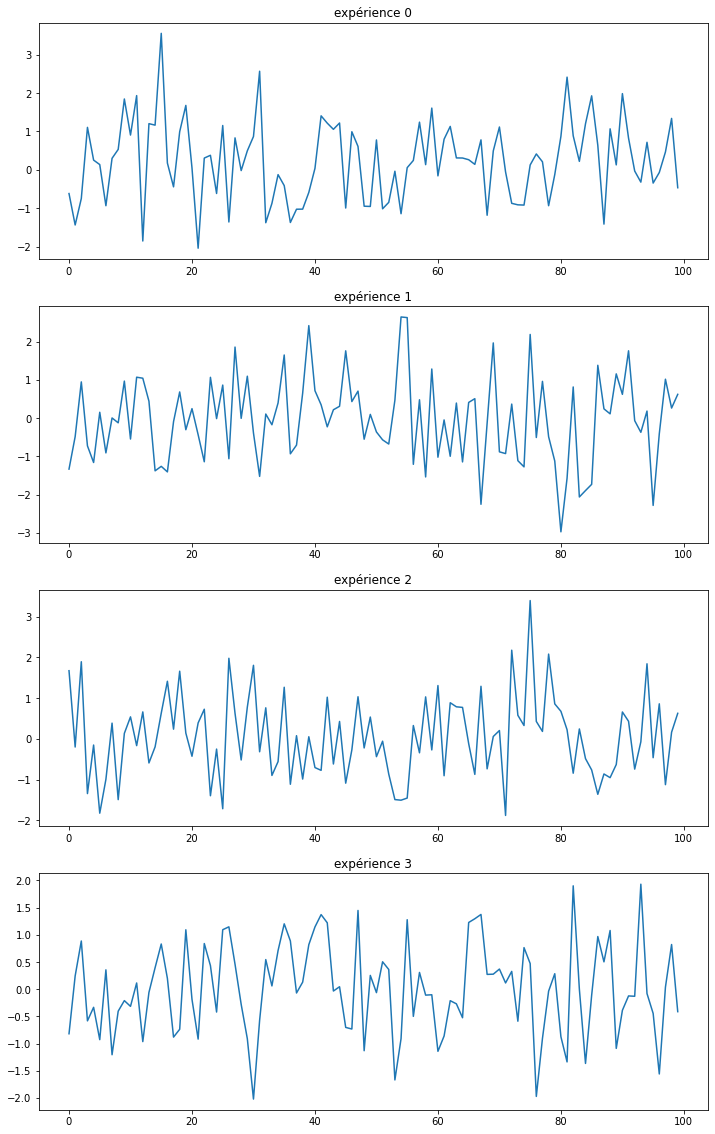

In [65]:
graphique(dataset)

# 2 -- Graphiques avancés

---



## Graphique de Classification avec Scatter()

In [67]:
from sklearn.datasets import load_iris

In [68]:
iris = load_iris()
x = iris.data
y = iris.target

print(f'x contient {x.shape[0]} exmples et {x.shape[1]} variables')
print(f'il y a {np.unique(y).size} classes')

x contient 150 exmples et 4 variables
il y a 3 classes


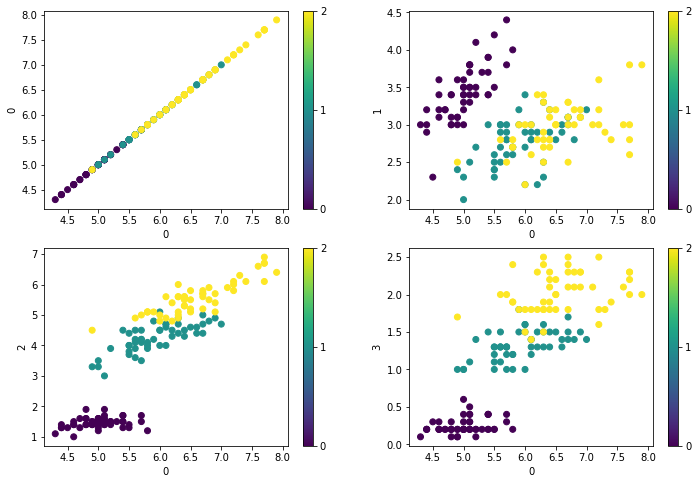

In [69]:
n = x.shape[1]
plt.figure(figsize=(12, 8))
for i in range(n):
    plt.subplot(n//2, n//2, i+1)
    plt.scatter(x[:, 0], x[:, i], c=y)
    plt.xlabel('0')
    plt.ylabel(i)
    plt.colorbar(ticks=list(np.unique(y)))
plt.show()

## Graphiques 3D

In [70]:
from mpl_toolkits.mplot3d import Axes3D

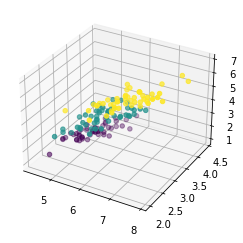

In [71]:
ax = plt.axes(projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:,2], c=y)

## Histogrammes

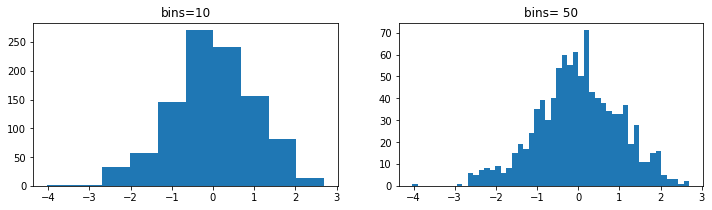

In [73]:
x = np.random.randn(1000)

plt.figure(figsize=(12, 3))
plt.subplot(121)
plt.hist(x, bins=10)
plt.title('bins=10')
plt.subplot(122)
plt.hist(x, bins=50)
plt.title('bins= 50')
plt.show()

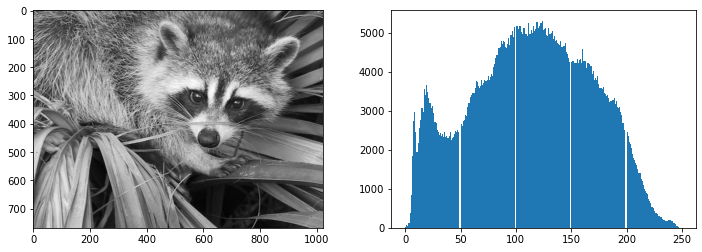

In [75]:
# histogramme d'une image
from scipy import misc
face = misc.face(gray=True)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(face, cmap='gray')
plt.subplot(122)
plt.hist(face.ravel(), bins=255)
plt.show()

# 3 -- Seaborn

In [15]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Pairplot() : La vue d'ensemble

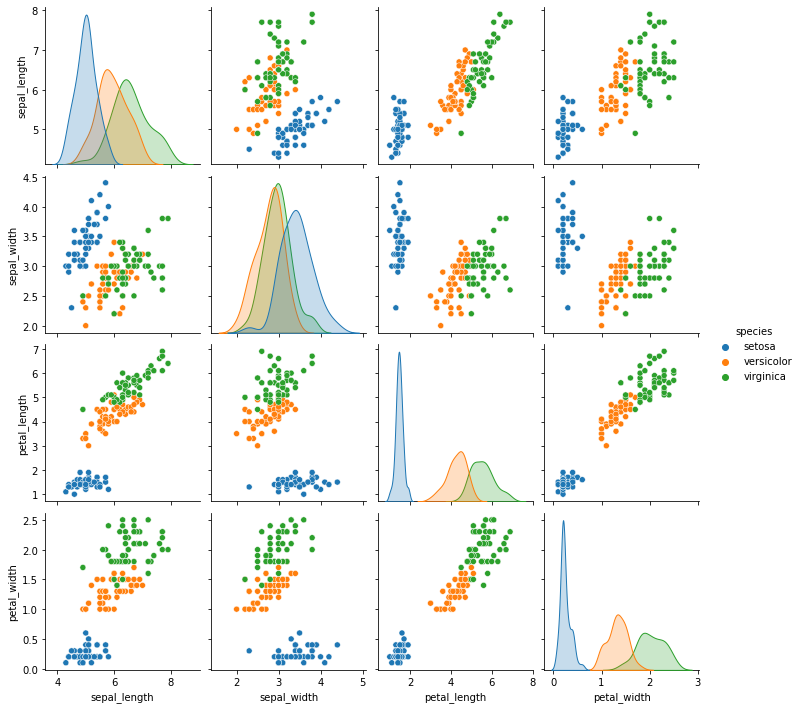

In [16]:
sns.pairplot(iris, hue='species')

## Visualiser des catégories

In [12]:
titanic = sns.load_dataset('titanic')
titanic.drop(['alone', 'alive', 'who', 'adult_male', 'embark_town', 'class'], axis=1, inplace=True)
titanic.dropna(axis=0, inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
1,1,1,female,38.0,1,0,71.2833,C,C
3,1,1,female,35.0,1,0,53.1000,S,C
6,0,1,male,54.0,0,0,51.8625,S,E
10,1,3,female,4.0,1,1,16.7000,S,G
11,1,1,female,58.0,0,0,26.5500,S,C


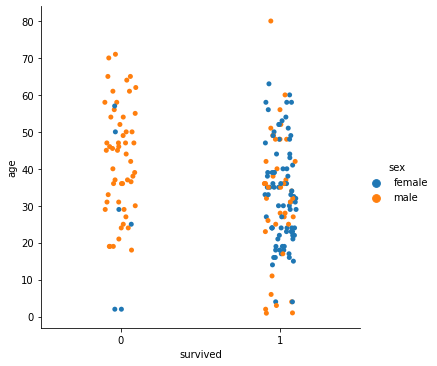

In [29]:
sns.catplot(x='survived', y='age', data=titanic, hue='sex')

<AxesSubplot:xlabel='pclass', ylabel='fare'>

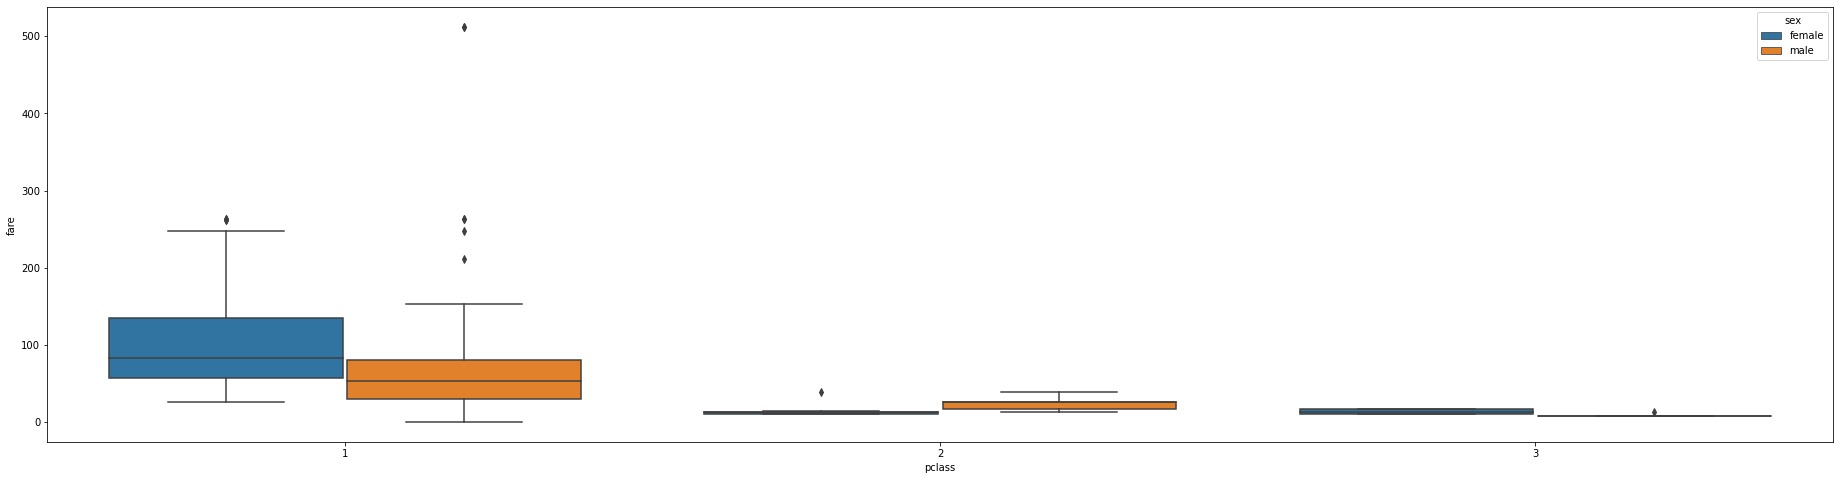

In [13]:
plt.figure(figsize=(32, 8))
sns.boxplot(x='pclass', y='fare', data=titanic, hue='sex')

## Visualisation de Distributions

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

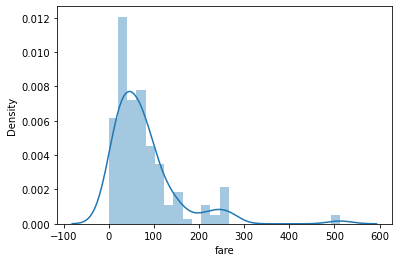

In [31]:
sns.distplot(titanic['fare'])

<AxesSubplot:>

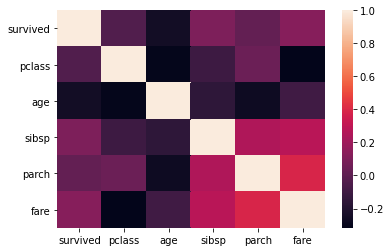

In [33]:
sns.heatmap(titanic.corr())

# 4 Exercice

In [7]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
plt.style.use('seaborn-dark-palette')

In [5]:
#charger le fichier 'homelessness.csv'
homelessness = pd.read_csv("datasets/homelessness.csv",sep=';')

#afficher les premières lignes 
homelessness.head(10)

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588
5,Mountain,Colorado,7607.0,3250.0,5691287
6,New England,Connecticut,2280.0,1696.0,3571520
7,South Atlantic,Delaware,708.0,374.0,965479
8,South Atlantic,District of Columbia,3770.0,3134.0,701547
9,South Atlantic,Florida,21443.0,9587.0,21244317


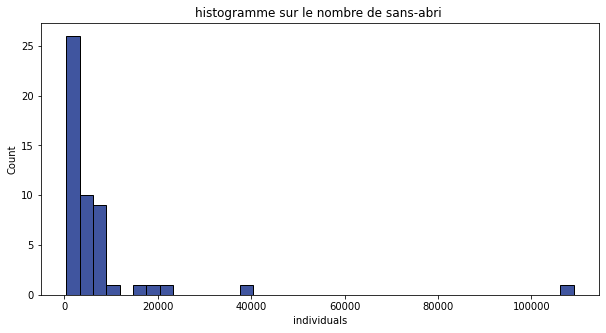

In [14]:
#faites un histogramme sur le nombre de sans-abri avec titre, légende
plt.figure(figsize=[10, 5])
sns.histplot(homelessness.individuals)
plt.title("histogramme sur le nombre de sans-abri ")
plt.show()

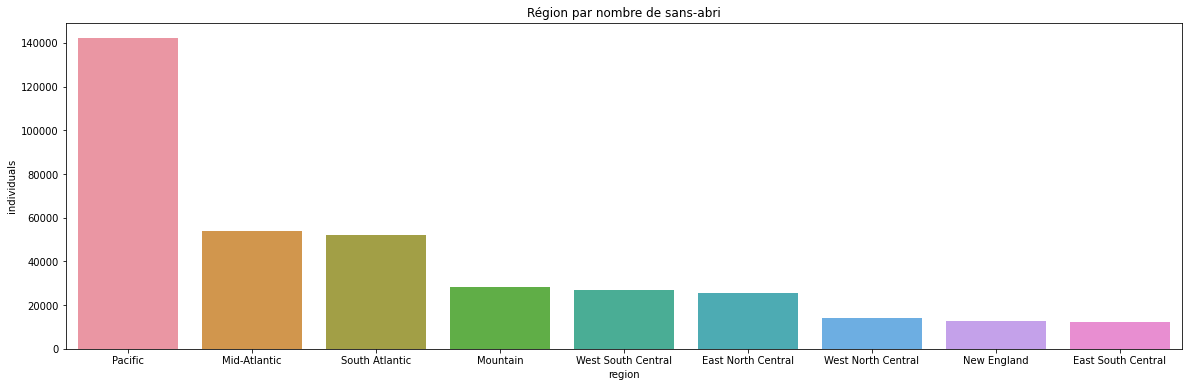

In [22]:
#faites un bar plot avec les régions où il y a le plus de sans-abri  avec titre, légende

homelessness_sorted = pd.DataFrame(homelessness.groupby("region")["individuals"].sum()).reset_index().sort_values(
    by="individuals", ascending=False)

plt.figure(figsize=[20, 6])
sns.barplot(homelessness_sorted.region,homelessness_sorted.individuals)
plt.title("Région par nombre de sans-abri")
plt.show()